<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>
<center>Author: Yubo Cai</center>


# Project: Catalan numbers



## Table of contents

- [1. Computing Catalan numbers](#Computing)
- [2. Catalan and generating functions](#CatalanGF)
- [3. Dealing with large Catalan numbers](#Bostan)
  * [Catalan and modulos: the Bostan Conjecture](#Bostan)
  * [Length of Catalan numbers](#Asymptotics)
- [4. Combinatorial interpretations of Catalan numbers](#Combinatorial)
  * [Paths in a triangle](#Triangle)
  * [Well-formed parentheses expressions](#Parentheses)
  * [Binary trees](#Trees)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/customProject.css").read()
    return HTML(styles)
css_styling()


In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
from pylab import *

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


# Please read!

<br><br>

<!--<div markdown=1 class=Abstract>-->

## General instructions:

3 Sessions:  Tuesday 3rd, Tuesday 10th, Thursday 19th.

### Organization:

* The project is individual.
* The deadline is Thursday 19th at 5:35pm (no late submissions).
* You must submit your .pynb file (and possibly a few figures in jpg or pdf if needed).

### Guidelines:

* The project is made of suggestions of mathematical and computational developments. Of course you don't have to solve everything to get a high grade.
* The coherence of your project will be evaluated. It is better to treat parts of the notebook carefully than to try to collect points everywhere.
* You can also suggest and solve your own questions, creativity will be rewarded.
* Questions are more or less difficult. If you are stuck, you can skip a question or try to solve a simpler case.
* Your codes must be commented. Explain what they do and why they work: every code cell in your notebook must be preceded or followed by a cell "Answers" which explains your results and methods.
* Mathematical explanations are to be given in plain text, not as comments of the code. 
* Print tests of all your functions.
* Your mathematical statements must be justified as well as possible.

Here are two cells that you can copy/paste throughout the Notebook:

<div markdown=1 class="Answers"> 
<i>Your answer.</i>

<div markdown=1 class="Prop"> 
<i>In this cell you can add your own additional questions (math or python).</i>

<a id="Computing"></a>
#  Computing Catalan numbers

The <a href="https://en.wikipedia.org/wiki/Catalan_number">Catalan numbers</a> $c_0,c_1,c_2,\dots$ are defined recursively as follows:
\begin{align*}
c_0&=1\\
c_1&=1\\
c_n&=\sum_{k=0}^{n-1} c_kc_{n-1-k}=c_0c_{n-1}+c_1c_{n-2}+\dots +c_{n-1}c_0 \qquad (\text{ for }n\geq 2). \tag{$\star$}
\end{align*}
For example,
\begin{align*}
c_2&=c_0c_1+c_1c_0=1\times 1+1\times 1=2,\\
c_3&=c_0c_2+c_1c_1+c_2c_0=1\times 2+1\times 1+2\times 1=5,\\
\dots
\end{align*}


<div markdown=1 class="DoIt"> 

1. Write a recursive function `CatalanRecursive(n)` which returns the $n$-th Catalan number.
2. Write a non recursive function `CatalanNotRecursive(n)` which returns the $n$-th Catalan number.<br>
<i>(It means that you will also use recursive formula ($\star$) but your function `CatalanNotRecursive(n)` should not call itself.)</i>

In [5]:
# Questions 3.1 - Recursive implementation of Catalan numbers
def CatalanRecursive(n):
    if n == 0:
        return 1
    if n == 1:
        return 1
    else:
        Cn = 0
        for i in range(0, n):
            Cn += CatalanRecursive(i) * CatalanRecursive(n - 1 - i)

    return Cn


# Questions 3.2 - NonRecursive implementation of Catalan numbers
def CatalanNonRecursive(n):
    if n == 0:
        return 1
    if n == 1:
        return 1
    C = [0] * (n + 1)
    C[0] = 1
    C[1] = 1
    for i in range(2, n + 1):
        C[i] = 0
        for j in range(0, i):
            C[i] += C[j] * C[i - j - 1]

    return C[n]


# Test of Question 3.1
print("--------- Question 3.1 ----------")
print("The first ten Catalan numbers with recursive method are ",
      [CatalanRecursive(i) for i in range(10)])

# Test of Question 3.2
print("--------- Question 3.2 ----------")
print("The first ten Catalan numbers with nonrecursive method are ",
      [CatalanNonRecursive(i) for i in range(10)])

--------- Question 3.1 ----------
The first ten Catalan numbers with recursive method are  [1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]
--------- Question 3.2 ----------
The first ten Catalan numbers with nonrecursive method are  [1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]


<div markdown=1 class="DoIt"> 

Compare the execution times of your different functions computing the Catalan numbers (say, for $1\leq n\leq 15$).<br>
You can import the `time` library:
```python
import time
```
In order to estimate the running time of some operation Test(), the syntax is
```
t1=time.process_time()
Test()
t2=time.process_time()
print(t2-t1)
```

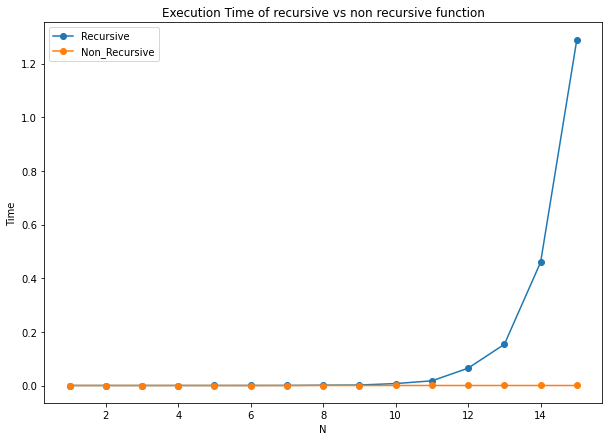

In [7]:
import time

# initialize the lists
RunningTimeRecursive = []
RunningTimeNonRecursive = []

for i in range(1, 16):
    t1 = time.process_time()
    CatalanRecursive(i)
    t2 = time.process_time()
    RunningTimeRecursive.append(t2 - t1)

    t3 = time.process_time()
    CatalanNonRecursive(i)
    t4 = time.process_time()
    RunningTimeNonRecursive.append(t4 - t3)

# plot the results
N = [i for i in range(1, 16)]
plt.figure(figsize=(10, 7))
plt.plot(N, RunningTimeRecursive, 'o-', label='Recursive')
plt.plot(N, RunningTimeNonRecursive, 'o-', label='Non_Recursive')
plt.legend()
plt.title("Execution Time of recursive vs non recursive function")
plt.xlabel("N")
plt.ylabel("Time")
plt.show()


<div markdown=1 class="Answers"> 

From the graph that we plot, we can see that the **recursive function is much slower than the non recursive one**. From $n=10$ the recursive function takes much more time than the non recursive one and **increases exponentially**. This is due to in the computation of $c_{n}$, the recursive function calls itself too much time with **repeated computation**. However, in the non recursive function we use list to store the values of $c_{n}$ and we don't need to compute them again.

<div markdown=1 class="Rmk"><a id="EquationE"></a> 
It can be proved that for every $n$
$$
c_{n}=\frac{1}{n+1}\binom{2n}{n}. \tag{E}
$$
You may try to use this formula to write another non-recursive function which returns $c_n$. Yet the formula (E) will not be useful for the rest of the project.

In [9]:
import math


def CatalanClosedForm(n):
    return int(
        (math.factorial(2 * n)) / (math.factorial(n + 1) * math.factorial(n)))


# Test of Question 3.3
print("--------- Question 3.3 ----------")
print("The first ten Catalan numbers with closed form are ",
      [CatalanClosedForm(i) for i in range(10)])


--------- Question 3.3 ----------
The first ten Catalan numbers with closed form are  [1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]


<div markdown=1 class="Answers"> 

From a simple computation we have for every $n$ that
$$
c_{n}=\frac{1}{n+1}\binom{2n}{n}=\frac{(2n)!}{(n+1)!n!}
$$
Then we can deduce from this function into the `Python` code.

<a id="CatalanGF"></a>
# Catalan and generating functions

Let 
$$
\mathcal{C}(x)=\sum_{n\geq 0}c_n x^n=1+x+2x^2+5x^3+\dots
$$
denote the generating function of the Catalan numbers.

<div markdown=1 class="DoIt"> 

1. **(Theory)** Use the recursive formula [($\star$)](#Computing) to prove that $\mathcal{C}(x)$ is a solution of the following equation of degree two: <br>
$$
\mathcal{C}(x)=1+x\mathcal{C}(x)^2. 
$$
<br>
(In this equation, $\mathcal{C}(x)$ is the unknown and $x$ is a parameter.)
2. Deduce a formula for $\mathcal{C}(x)$. What is the radius of convergence?

<div markdown=1 class="Answers"> 2.1

From the equation $\mathcal{C}(x)=1+x\mathcal{C}(x)^2$ we have
$$
\mathcal{C}(x)=1+x\mathcal{C}(x)^2 \Rightarrow \frac{\mathcal{C}(x)-1}{x}=\mathcal{C}(x)^2
$$
Then we try to prove the **LHS** equal to **RHS**. 

For **LHS** we have 
$$
\begin{aligned}
\frac{\mathcal{C}(x)-1}{x} &= \frac{\sum_{n\geq 1}c_n x^n}{x}\\
& = {\sum_{n\geq 0}c_{n+1} x^{n}}
\end{aligned}
$$

For **RHS**, we apply we got
$$
\begin{aligned}
\mathcal{C}(x)^{2} &= (\sum_{n\geq 0}c_n x^n) ^{2}\\
&= \mathcal\sum_{n\geq 0}(\sum_{k=0}^{n} c_{k}c_{n-k}) x^{n} \\
&= \mathcal\sum_{n\geq 0} c_{n+1} x^n \quad (\text{By Definition})
\end{aligned}
$$

Therefore we have
$$
\mathcal{C}(x)^{2} = \mathcal\sum_{n\geq 0} c_{n+1} x^n = \frac{\mathcal{C}(x)-1}{x}
$$
Then we prove that $\mathcal{C}(x)$ is a solution for the equation of 
$$
\mathcal{C}(x)=1+x\mathcal{C}(x)^2
$$

<div markdown=1 class="Prop"> 

We can deduce the equation of degree two for $\mathcal{C}(x)=1+x\mathcal{C}(x)^2$.

<div markdown=1 class="Answers"> Further Questions

We use the ordinary generating function for the Catalan numbers, we have
$$
\mathcal{C}(x)=\sum_{n\ge 0}c_nx^n=\sum_{n\ge 0}\sum_{k=0}^{n-1}c_kc_{n-1-k}x^n
$$
Since we know $C_{0} = 1 $ , we have
$$
\begin{aligned}
\mathcal{C}(x)&=\sum_{n\ge 0}\sum_{k=0}^{n-1}c_kc_{n-1-k}x^n\\
&=1+\sum_{n\ge 1}\sum_{k=0}^{n-1}c_kc_{n-1-k}x^n\\
&=1+x\sum_{n\ge 0}\sum_{k=0}^nc_kc_{n-k}x^n\\
&=1+x\left(\sum_{n\ge 0}c_nx^n\right)^2\\
&=1+x\mathcal{C}(x)^2
\end{aligned}
$$
Therefore, we got 
$$
\mathcal{C}(x)=1+x\mathcal{C}(x)^2
$$

In [10]:
# Questions 4.2 - Computation with sympy of the equation
x = Symbol('x')
c = Symbol('c')
solution = solve(c - 1 - x * c**2, c)

# display the solution in latex
print("--------- Question 4.2 ----------")
print("The solution of the equation in is ")
display(solution[0]), display(solution[1])
print("The solution of the equation in Latex is ", (latex(solution[0])),
      latex(solution[1]))


--------- Question 4.2 ----------
The solution of the equation in is 


(1 - sqrt(1 - 4*x))/(2*x)

(sqrt(1 - 4*x) + 1)/(2*x)

The solution of the equation in Latex is  \frac{1 - \sqrt{1 - 4 x}}{2 x} \frac{\sqrt{1 - 4 x} + 1}{2 x}


<div markdown=1 class="Answers"> 2.2

We use `sympy` to solve the equation $\mathcal{C}(x)=1+x\mathcal{C}(x)^2$ and we get
$$
\mathcal{C}_{1}(x)= \frac{1 - \sqrt{1 - 4 x}}{2 x} \quad \text{and} \quad \mathcal{C}_{2}(x)= \frac{1 + \sqrt{1 - 4 x}}{2 x}
$$
From the two possibilities, the $\mathcal{C}_{1}(x)$ must be chosen because only the choice of the first gives
$$
C_0=\lim _{x \rightarrow 0} \mathcal{C}_{1}(x)=1
$$
Therefore we have $\mathcal{C}(x)=\frac{1 - \sqrt{1 - 4 x}}{2 x}$

Then we compute the radius of convergence of $\mathcal{C}(x)$. For the definition of [radius of convergence](https://en.wikipedia.org/wiki/Radius_of_convergence) from Wiki page. We use the expression of $\mathcal{C}(x)$ in power series that
$$
\mathcal{C}(x)= \frac{1 - \sqrt{1 - 4 x}}{2 x}= \sum_{n\geq 0}c_n x^n
$$
Base on [D'Alembert's test](https://en.wikipedia.org/wiki/Ratio_test), for radius of convergence $R$ we compute $\lim _{n \rightarrow \infty}\left|\frac{c_{n+1}}{c_n}\right|=\rho$ for $\sum_{n\geq 0}c_n x^n$
$$
\begin{aligned}
\rho &= \lim_{n \rightarrow \infty}|\frac{c_{n+1}}{c_n}|\\
&= \lim_{n \rightarrow \infty} \left| \frac{\frac{1}{n+2} \binom{2n+2}{n+2}}{\frac{1}{n+1} \binom{2n}{n}} \right|\\
&= \lim_{n \rightarrow \infty} \left|\frac{4n+4}{n+2} \right|\\
&= \lim_{n \rightarrow \infty} \left|4-\frac{4}{n+2} \right|\\
&= 4
\end{aligned}
$$
Since $\rho \neq 0$, then we have the radius of convergence $R=\frac{1}{\rho}=\frac{1}{4}$

<div markdown=1 class="Prop"> 

Program computes the **Catalan numbers** using formula of $c_{n}=\frac{1}{n+1}\binom{2n}{n}=\frac{(2n)!}{(n+1)!n!}$ and compare the complexity of the functions.

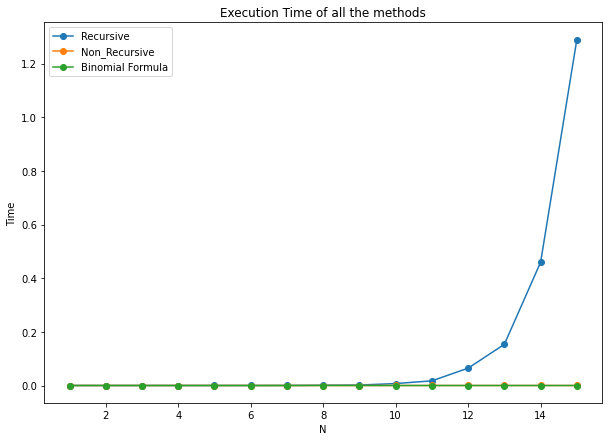

In [14]:
# Testing the running time of different methods
RunningTimeBinom = []

for n in range(1, 16):
    t1 = time.process_time()
    CatalanClosedForm(n)
    t2 = time.process_time()
    RunningTimeBinom.append(t2 - t1)

    
# plot the results
N = [i for i in range(1, 16)]
plt.figure(figsize=(10, 7))
plt.plot(N, RunningTimeRecursive, 'o-', label='Recursive')
plt.plot(N, RunningTimeNonRecursive, 'o-', label='Non_Recursive')
plt.plot(N, RunningTimeBinom, 'o-', label='Binomial Formula')
plt.legend()
plt.title("Execution Time of all the methods")
plt.xlabel("N")
plt.ylabel("Time")
plt.show()

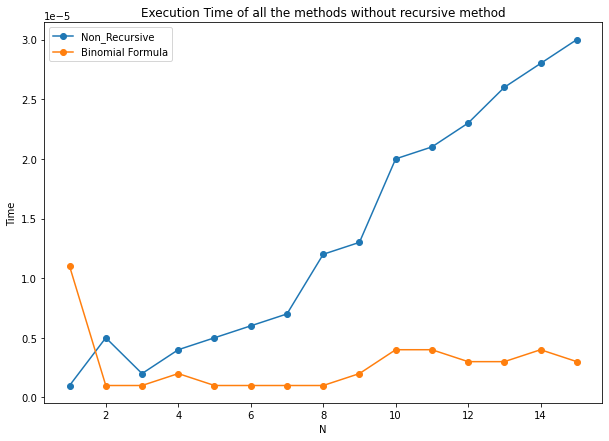

In [15]:
# Compare without the recursive method
plt.figure(figsize=(10, 7))
plt.plot(N, RunningTimeNonRecursive, 'o-', label='Non_Recursive')
plt.plot(N, RunningTimeBinom, 'o-', label='Binomial Formula')
plt.legend()
plt.title("Execution Time of all the methods without recursive method")
plt.xlabel("N")
plt.ylabel("Time")
plt.show()

<div markdown=1 class="Answers"> 

From the two graph we can see that the formula of $\mathcal{c}_{n}=\frac{1}{n+1}\binom{2n}{n}$ has the highest computation efficiency. However, the non-recursive method has more execution time than the method above, compare with recursive method the complexity is still much better since the execution time is in the level of $10^{-5}sec$.

<div markdown=1 class="Prop"> 

We can prove the expression of 
$$
c_{n}=\frac{1}{n+1}\binom{2n}{n}=\frac{(2n)!}{(n+1)!n!}
$$
with $\mathcal{C}(x)= \frac{1 - \sqrt{1 - 4 x}}{2 x}= \sum_{n\geq 0}c_n x^n$

<div markdown=1 class="Answers"> 

For power series we have
$$
\sqrt{1+y}=\sum_{n=0}^{\infty}\left(\begin{array}{c}
\frac{1}{2} \\
n
\end{array}\right) y^n=\sum_{n=0}^{\infty} \frac{(-1)^{n+1}}{4^n(2 n-1)}\left(\begin{array}{c}
2 n \\
n
\end{array}\right) y^n
$$
We denote that $y=-4x$ we got
$$
\sqrt{1-4 x}=1-\sum_{n=1}^{\infty} \frac{1}{2 n-1}\left(\begin{array}{c}
2 n \\
n
\end{array}\right) x^n
$$
Therefore we got
$$
\mathcal{C}(x)= \frac{1 - \sqrt{1 - 4 x}}{2 x} = \sum_{n=1}^{\infty} \frac{1}{2(2 n-1)}\left(\begin{array}{c}
2 n \\
n
\end{array}\right) x^{n-1} = \sum_{n\geq 0}c_n x^n
$$
We can deduce that
$$
c_{n}=\frac{1}{2(2n+1)} \binom{2n+2}{n+1}=\frac{1}{n+1} \binom{2n}{n}
$$

<a id="GeneratingFunctions"></a>
## Tutorial: how to manipulate Generating Functions with SymPy

We work out with the example of 
$$
f(x)=\frac{1}{1-2x}=1+2x+4x^2+8x^3+16x^4+ \dots
$$
We first introduce variable $x$ and function $f$ as follows:

In [16]:
x=var('x')
f=(1/(1-2*x))

print('f = '+str(f))
print('series expansion of f at 0 and of order 10 is: '+str(f.series(x,0,10)))
display(f.series(x,0,10))


f = 1/(1 - 2*x)
series expansion of f at 0 and of order 10 is: 1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + 256*x**8 + 512*x**9 + O(x**10)


1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + 256*x**8 + 512*x**9 + O(x**10)

One can extract coefficient $n$ as follows:
* $f$ has to be truncated at order $k$ (for some $k>n$) with `f.series(x,0,k)`
* the $n$-th coefficient is then extracted by `f.coeff(x**n)`

In [17]:
f_truncated = f.series(x,0,8)
print('Truncation of f is '+str(f_truncated))
n=6
nthcoefficient=f_truncated.coeff(x**n)
print(str(n)+'th coefficient is: '+str(nthcoefficient))
display(f_truncated)


Truncation of f is 1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + O(x**8)
6th coefficient is: 64


1 + 2*x + 4*x**2 + 8*x**3 + 16*x**4 + 32*x**5 + 64*x**6 + 128*x**7 + O(x**8)

<div markdown=1 class="DoIt"> Use SymPy to write another programm which computes the Catalan numbers using $\mathcal{C}(x)$, and compare the execution times with the functions of the first part of the Project.

In [18]:
# We compute C(x) with Taylor Expansion
x = var('x')
f = (1 - sqrt(1 - 4 * x)) / (2 * x)


def CatalanTaylorExpansion(n):
    return f.series(x, 0, n).coeff(x**(n - 1))


print("--------- Question 4.1.1 ----------")
lis = [CatalanTaylorExpansion(i) for i in range(11)]
lis[1] = 1
print("The first ten Catalan numbers with Taylor Expansion are ", lis[1:])


--------- Question 4.1.1 ----------
The first ten Catalan numbers with Taylor Expansion are  [1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]


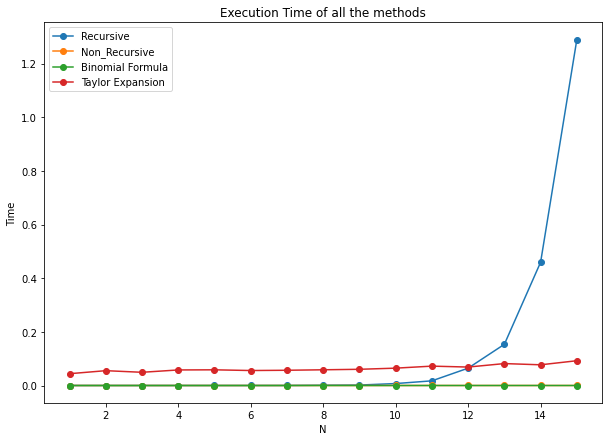

In [21]:
# Testing the running time of Taylor Expansion
RunningTimeTaylor = []

for i in range(1, 16):
    t1 = time.process_time()
    CatalanTaylorExpansion(i)
    t2 = time.process_time()
    RunningTimeTaylor.append(t2 - t1)

# plot the results
N = [i for i in range(1, 16)]
plt.figure(figsize=(10, 7))
plt.plot(N, RunningTimeRecursive, 'o-', label='Recursive')
plt.plot(N, RunningTimeNonRecursive, 'o-', label='Non_Recursive')
plt.plot(N, RunningTimeBinom, 'o-', label='Binomial Formula')
plt.plot(N, RunningTimeTaylor, 'o-', label='Taylor Expansion')
plt.legend()
plt.title("Execution Time of all the methods")
plt.xlabel("N")
plt.ylabel("Time")
plt.show()

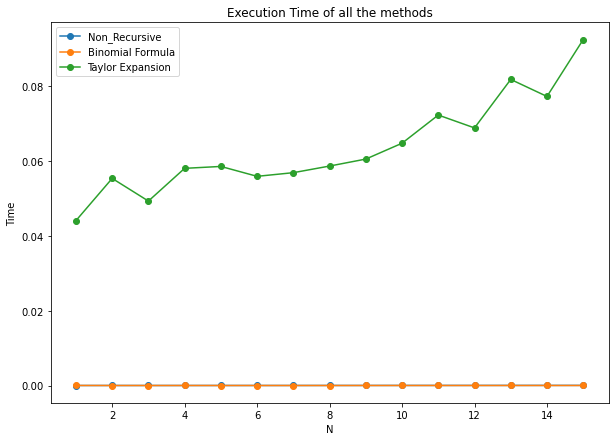

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(N, RunningTimeNonRecursive, 'o-', label='Non_Recursive')
plt.plot(N, RunningTimeBinom, 'o-', label='Binomial Formula')
plt.plot(N, RunningTimeTaylor, 'o-', label='Taylor Expansion')
plt.legend()
plt.title("Execution Time of all the methods")
plt.xlabel("N")
plt.ylabel("Time")
plt.show()

<div markdown=1 class="Answers"> 

From the two graph we can see that the Taylor Expansion method is much faster than the recursive method but much slower than the method non-recursive and Binomial Formula.

### A variant: Motzkin numbers

The <i>Motzkin numbers</i> $m_0,m_1,m_2,\dots$ are similar to Catalan numbers and defined by $m_0=m_1=1$ and for every $n\geq 2$
$$
m_n=m_{n-1}+\sum_{k=0}^{n-2}m_km_{n-2-k}.
$$

<div markdown=1 class="DoIt"> 

**(Theory + SymPy)** 

1. Find the generating function $\mathcal{M}(x)=\sum_{n\geq 0}m_nx^n$. 
2. Compute the radius of convergence of $\mathcal{C}$ and $\mathcal{M}$. Compare with numerical experiments: which sequence is growing fastest between $(c_n)$ and $(m_n)$?

<div markdown=1 class="Answers"> 4.1.1.1

We first try to simplify the motzkin numbers recurrence relation. We have
$$
\mathcal{M}(x)=\sum_{n\geq 0}m_nx^n = \sum_{n \geq 0}(m_{n-1}+\sum^{n-2}_{k=0}m_{k}m_{n-2-k})x^{n}
$$
Since we have $\mathcal{M}_0 = \mathcal{M}_1 = 1$, therefore we have
$$
\begin{aligned}
\mathcal{M}(x) &= \sum_{n \geq 0}(m_{n-1}+\sum^{n-2}_{k=0}m_{k}m_{n-2-k})x^{n}\\
&= x \sum_{n \geq 0}m_{n-1} x^{n-1} + \sum_{n \geq 0} \sum^{n-2}_{k=0}m_{k}m_{n-2-k} x^{n}\\
&= x \mathcal{M}(x) + 1 + \sum_{n \geq 2} \sum^{n-2}_{k=0}m_{k}m_{n-2-k} x^{n} \\
&= x \mathcal{M}(x) + 1 + x^{2}\sum_{n \geq 0} \sum^{n}_{k=0}m_{k}m_{n-k}x^{n}\\
&= x \mathcal{M}(x) + 1 + x^{2} (\sum_{n \geq 0} m_{n}x^{n})^{2}\\
&= x \mathcal{M}(x) + 1 + x^{2} \mathcal{M(x)}
\end{aligned}
$$

Therefore, we know that  $\mathcal{M}(x)=\sum_{n\geq 0}m_nx^n$ is a root for $x^2 M^2 + (x-1)M + 1 =0$. 


In [28]:
x = symbols('x')
M = symbols('M')
SeriesM = solve(x**2 * M**2 + x * M - M + 1, M)
print(SeriesM)
display(SeriesM[0])
display(SeriesM[1])

[(-x - sqrt(-(x + 1)*(3*x - 1)) + 1)/(2*x**2), (-x + sqrt(-(x + 1)*(3*x - 1)) + 1)/(2*x**2)]


(-x - sqrt(-(x + 1)*(3*x - 1)) + 1)/(2*x**2)

(-x + sqrt(-(x + 1)*(3*x - 1)) + 1)/(2*x**2)

<div markdown=1 class="Answers"> 4.1.1.1

We use `sympy` to solve the equation we have
$$
\mathcal{M}_{1}(x)= \frac{1 -x - \sqrt{1 - 2 x-3x^2}}{2 x^2} \quad \mathcal{M}_{2}(x)= \frac{1 -x + \sqrt{1 - 2 x-3x^2}}{2 x^2}
$$
Since we know $\mathcal{M}(0)=1$, therefore the only possible solution is 
$$
\mathcal{M}(x)= \frac{1 -x - \sqrt{1 - 2 x-3x^2}}{2 x^2}
$$


In [24]:
# Implementation of the formula of Motzkin Numbers  
def MotzkinFormula(n):
    x = symbols('x')
    m= (1-x-sqrt(1-2*x-3*x**2))/(2*x**2)
    m_truncated = m.series(x,0,n+1)
    return m_truncated.coeff(x**n)
  
print("--------- Question 4.1.1.1 ----------")
lis = [MotzkinFormula(i) for i in range(11)]
lis[0] = 1
print("The first ten Motzkin numbers with Taylor Expansion are ", lis[1:])


--------- Question 4.1.1.1 ----------
The first ten Motzkin numbers with Taylor Expansion are  [1, 2, 4, 9, 21, 51, 127, 323, 835, 2188]


<div markdown=1 class="Answers"> 4.1.1.2

An integral representation of Motzkin numbers is given by
$$
m_n=\frac{2}{\pi} \int_0^\pi \sin (x)^2(2 \cos (x)+1)^n d x .
$$
They have the asymptotic behaviour
$$
m_n  \sim \frac{1}{2 \sqrt{\pi}}\left(\frac{3}{n}\right)^{3 / 2} 3^n, n \rightarrow \infty
$$
Therefore, they have the same radius of convergence. We apply the similar method as Catalan number. Base on [D'Alembert's test](https://en.wikipedia.org/wiki/Ratio_test), for radius of convergence $R$ we compute $\lim _{n \rightarrow \infty}\left|\frac{m_{n+1}}{m_n}\right|=\rho$ for $\sum_{n\geq 0}m_n x^n$
$$
\begin{aligned}
\rho &= \lim_{n \rightarrow \infty}|\frac{m_{n+1}}{m_n}|\\
&= \lim_{n \rightarrow \infty} \left| \frac{(\frac{3}{n+1})^{\frac{3}{2}}3^{n+1}}{(\frac{3}{n})^{\frac{3}{2}}3^{n}} \right|\\
&= \lim_{n \rightarrow \infty} \left| 3(\frac{n}{n+1})^{3/2} \right|\\
&= 3
\end{aligned}
$$
Since $\rho \neq 0$, then we have the radius of convergence $R=\frac{1}{\rho}=\frac{1}{3}$.

Or we can illustrate in this way, from the definition of radius of convergence, we need to find an $R$ such that when $\|x\|<R$ the series converges. Then we observe that radius shows when $1-2R-3R^2 = 0$. Then we got $R=\frac{1}{3}$ or $r=-1$. Since when $x<1$, the function diverges, we can also get $R=\frac{1}{3}$

Then we can say the radius of convergence of $\mathcal{C}$ is smaller than $\mathcal{M}$. Therefore the sequence of $c_n$ is growing faster than $m_n$. We can also show this in the graph.

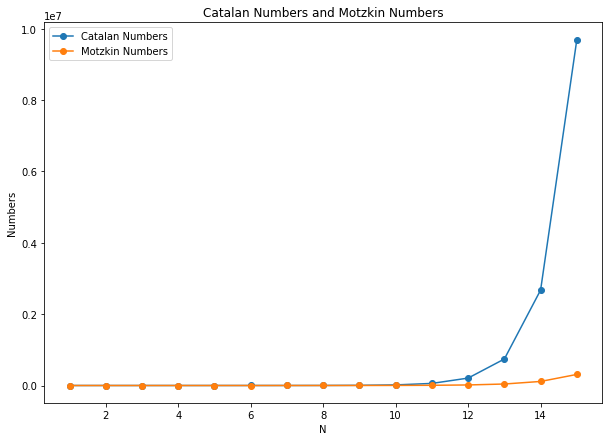

--------- The first 15 numbers of Catalan and Motzkin ----------
[1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786, 208012, 742900, 2674440, 9694845]
[1, 2, 4, 9, 21, 51, 127, 323, 835, 2188, 5798, 15511, 41835, 113634, 310572]


In [26]:
# plot the Catalan numbers and Motzkin numbers in the same graph
N = [i for i in range(1, 16)]
plt.figure(figsize=(10, 7))
lis_catalan = [CatalanNonRecursive(i) for i in range(1, 16)]
lis_motzkin = [MotzkinFormula(i) for i in range(1, 16)]
plt.plot(N, lis_catalan, 'o-', label='Catalan Numbers')
plt.plot(N, lis_motzkin, 'o-', label='Motzkin Numbers')
plt.legend()
plt.title("Catalan Numbers and Motzkin Numbers")
plt.xlabel("N")
plt.ylabel("Numbers")
plt.show()

print("--------- The first 15 numbers of Catalan and Motzkin ----------")
print(lis_catalan)
print(lis_motzkin)


# Dealing with large Catalan numbers

<a id="Bostan"></a>
## Catalan and modulos: the Bostan Conjecture

<div markdown=1 class="DoIt"> 

Alin Bostan (computer scientist at INRIA and Ecole Polytechnique) conjectured a few years ago <a href="http://www.mat.univie.ac.at/%7Eslc/wpapers/s80vortrag/bostan.pdf">(see this link p.26)</a> that in basis 10 the last digit of $c_n$ is never $3$. So far this is still an open problem.<br>

1. Check the conjecture for $1\leq n\leq 100$. The output should look like
```python
Catalan 1 mod 10 is 1: the Conjecture is True
Catalan 2 mod 10 is 2: the Conjecture is True
Catalan 3 mod 10 is 5: the Conjecture is True
Catalan 4 mod 10 is 4: the Conjecture is True
...
```
2. How to check the conjecture for very large values? Try for example with $7000\leq n\leq 7100$.<br>
<i>(Hint: Be careful how you compute $c_n \mod 10$, since $c_n$ grows very fast!)</i>
3. More generally, what is the frequency of $0,1,\dots,9$ among last digits of the $n$ first Catalan numbers?


In [27]:
# We test the conjecture for 1 to 100
for n in range(1, 101):
    if CatalanClosedForm(n) % 10 != 3:
        print('Catalan', n, 'mode 10 is',
              CatalanClosedForm(n) % 10, ':the Conjecture is', True)
    else:
        print('the Conjecture is', False)


Catalan 1 mode 10 is 1 :the Conjecture is True
Catalan 2 mode 10 is 2 :the Conjecture is True
Catalan 3 mode 10 is 5 :the Conjecture is True
Catalan 4 mode 10 is 4 :the Conjecture is True
Catalan 5 mode 10 is 2 :the Conjecture is True
Catalan 6 mode 10 is 2 :the Conjecture is True
Catalan 7 mode 10 is 9 :the Conjecture is True
Catalan 8 mode 10 is 0 :the Conjecture is True
Catalan 9 mode 10 is 2 :the Conjecture is True
Catalan 10 mode 10 is 6 :the Conjecture is True
Catalan 11 mode 10 is 6 :the Conjecture is True
Catalan 12 mode 10 is 2 :the Conjecture is True
Catalan 13 mode 10 is 0 :the Conjecture is True
Catalan 14 mode 10 is 0 :the Conjecture is True
Catalan 15 mode 10 is 5 :the Conjecture is True
Catalan 16 mode 10 is 0 :the Conjecture is True
Catalan 17 mode 10 is 0 :the Conjecture is True
Catalan 18 mode 10 is 0 :the Conjecture is True
Catalan 19 mode 10 is 0 :the Conjecture is True
Catalan 20 mode 10 is 0 :the Conjecture is True
Catalan 21 mode 10 is 0 :the Conjecture is True
C

<div markdown=1 class="Answers"> 5.1.1

We can use the function `CatalanClosedForm(n)` test the conjecture. We can see that the conjecture is true for $1\leq n\leq 100$.

In [30]:
def precalc(MOD, num):
    catalan = [0] * num
    catalan[0], catalan[1] = 1, 1
    for i in range(2, num):
        total = 0
        for j in range(1, i+1):
            left = catalan[j-1] % MOD
            right = catalan[i-j] % MOD
            total = (total + (left * right) % MOD) % MOD
        catalan[i] = total
    return catalan


if __name__ == '__main__':
    catalan = precalc(10, 8000)
    for i in range(7000, 7101):
        if catalan[i] != 3:
            print('Catalan', i, 'mode 10 is', catalan[i], ':the Conjecture is',
                  True)
        else:
            print('the Conjecture is', False)

Catalan 7000 mode 10 is 4 :the Conjecture is True
Catalan 7001 mode 10 is 4 :the Conjecture is True
Catalan 7002 mode 10 is 8 :the Conjecture is True
Catalan 7003 mode 10 is 0 :the Conjecture is True
Catalan 7004 mode 10 is 6 :the Conjecture is True
Catalan 7005 mode 10 is 8 :the Conjecture is True
Catalan 7006 mode 10 is 8 :the Conjecture is True
Catalan 7007 mode 10 is 6 :the Conjecture is True
Catalan 7008 mode 10 is 0 :the Conjecture is True
Catalan 7009 mode 10 is 8 :the Conjecture is True
Catalan 7010 mode 10 is 4 :the Conjecture is True
Catalan 7011 mode 10 is 4 :the Conjecture is True
Catalan 7012 mode 10 is 8 :the Conjecture is True
Catalan 7013 mode 10 is 0 :the Conjecture is True
Catalan 7014 mode 10 is 0 :the Conjecture is True
Catalan 7015 mode 10 is 0 :the Conjecture is True
Catalan 7016 mode 10 is 0 :the Conjecture is True
Catalan 7017 mode 10 is 0 :the Conjecture is True
Catalan 7018 mode 10 is 0 :the Conjecture is True
Catalan 7019 mode 10 is 0 :the Conjecture is True


<div markdown=1 class="Answers"> 5.1.2

Since our previous function is not that efficient, we need to apply other algorithms. We use the property that
$$
(a \cdot b) \text{ mod } p = ((a \text{ mod } p) \cdot (b \text{ mod } p)) \text{ mod } p
$$
This is easy to prove, we assume that $k_1 = (a \text{ mod } p) $ and $k_{2}= (b \text{ mod } p))$. Therefore, we have $a=mq+k_1$ and $b=nq+k_2$ where $m,n \in \mathbb{Z}$. We have
$$
\begin{aligned}
(a \cdot b) \text{ mod } p &= (mnq^{2}+(mk_{2}+nk_{1})q+k_{1}k_{2})\text{ mod } p \\
&= (k_{1}k_{2})\text{ mod } p \\
&= ((a \text{ mod } p) \cdot (b \text{ mod } p)) \text{ mod } p
\end{aligned}
$$
Then we can use this property to write the recursive function as above. After all the computation, we find that the conjecture is true for $0 \leq n\leq 7101$.

In [31]:
# we use a dictionary to store the frequency of the last digit of Catalan numbers
# we test the case with n = 1000, 5000, 10000
catalan1 = precalc(10, 1000)
catalan2 = precalc(10, 5000)
catalan3 = precalc(10, 10000)

def count_last_digit(catalan):
    count = {}
    for el in catalan:
        if el in count:
            count[el] += 1
        else:
            count[el] = 1

    for key in count:
        count[key] = count[key] / len(catalan)

    return count

count1 = count_last_digit(catalan1)
count2 = count_last_digit(catalan2)
count3 = count_last_digit(catalan3)

# print catalan 1 and catalan 2
def print_catalan(count):
    for key in count:
        print('The frequency of the last digit', key, 'is ', count[key])


print('-------- The test case with n = 1000 --------')
print_catalan(count1)
print('-------- The test case with n = 5000 --------')
print_catalan(count2)
print('-------- The test case with n = 10000 --------')
print_catalan(count3)

-------- The test case with n = 1000 --------
The frequency of the last digit 1 is  0.002
The frequency of the last digit 2 is  0.056
The frequency of the last digit 5 is  0.004
The frequency of the last digit 4 is  0.073
The frequency of the last digit 9 is  0.003
The frequency of the last digit 0 is  0.781
The frequency of the last digit 6 is  0.03
The frequency of the last digit 8 is  0.05
The frequency of the last digit 7 is  0.001
-------- The test case with n = 5000 --------
The frequency of the last digit 1 is  0.0004
The frequency of the last digit 2 is  0.0292
The frequency of the last digit 5 is  0.0014
The frequency of the last digit 4 is  0.0414
The frequency of the last digit 9 is  0.0006
The frequency of the last digit 0 is  0.8692
The frequency of the last digit 6 is  0.0224
The frequency of the last digit 8 is  0.0352
The frequency of the last digit 7 is  0.0002
-------- The test case with n = 10000 --------
The frequency of the last digit 1 is  0.0002
The frequency of 

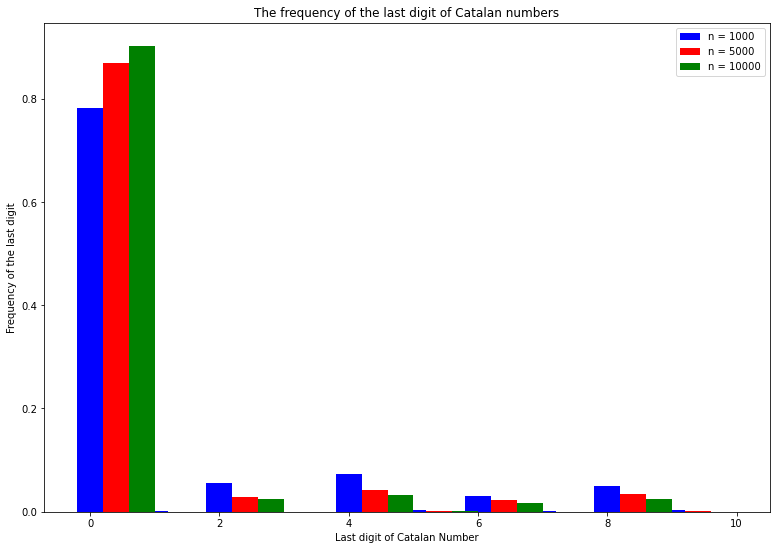

In [32]:
# We can also plot the bar chart to show it
x1 = list(count1.keys())
y1 = list(count1.values())
y2 = list(count2.values())
y3 = list(count3.values())
x = range(len(x1))

plt.figure(figsize=(13, 9))
# plot the bar separately
plt.bar(x1, y1, width=0.4, color='b', label='n = 1000')
plt.bar([i + 0.4 for i in x1], y2, width=0.4, color='r', label='n = 5000')
plt.bar([i + 0.8 for i in x1], y3, width=0.4, color='g', label='n = 10000')
plt.xlabel('Last digit of Catalan Number')
plt.ylabel('Frequency of the last digit')
plt.title('The frequency of the last digit of Catalan numbers')
plt.legend()

plt.show()

<div markdown=1 class="Answers"> 5.1.3

We test the case for $n=1000$, $n=5000$, and $n=10000$. From the bar chart and the output of our test, we may deduce from that in basis 10 the last digit of $c_n$ is never $3$. When $n$ increase, we can find following 
- The probability for last digits of Catalan numbers is 0 getting increases. 
- The probability for last digits of Catalan numbers is even number getting decreases.
- The probability for last digits of Catalan numbers is odd number (3 not included) is really small, which means the last digits of Catalan numbers is rarely odd when $n$ is a large number.

<a id="Asymptotics"></a>
## The <i>length</i> of large Catalan numbers

It can be proved (this is beyond the level of Bachelor 2, a possible reference is p.384 in Ph.Flajolet, R.Sedgewick, <i>Analytic Combinatorics</i>) that for every $n$ we have
$$
\frac{4^n}{\sqrt{\pi n^3}}\big(1-\frac{9}{8n}\big) \leq c_n \leq \frac{4^n}{\sqrt{\pi n^3}}, \tag{\$}
$$
which yields very good approximations when $n$ is large.
We will use this approximation to estimate the <i>length</i> (<i>i.e.</i> the number of digits) of $c_n$ when $n$  is a power of ten.

<div markdown=1 class="DoIt"> 
Consider the following table which records the <i>length</i> of $c_{10}$, $c_{100}$, $c_{1000}$,...


<font size="+3">
<table>
            <tr>
                <td width="100"> $c_{10^n}$</td>
                <td > Number of digits of $c_{10^n}$</td>
            </tr>
            <tr>
                <td width="100"> $c_{10}$</td>
                <td > 5</td>
            </tr>
            <tr>
                <td width="100"> $c_{100}$</td>
                <td > 57</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^3}$</td>
                <td > 598</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^4}$</td>
                <td > 6015</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^5}$</td>
                <td > 60199</td>
            </tr>
            <tr>
                <td width="100"> $c_{10^6}$</td>
                <td > 602051</td>
            </tr>
</table>
</font>

(For instance, $c_{10}=16796$ which has $5$ digits.)

The goal is to complete the table. (An interesting challenge could be to break the record of <a href="https://oeis.org/A114466">this sequence in the Online Encyclopedia of Integer Sequences</a>!)<br>
For that purpose you have to
1. **(Theory)** Find somewhere (or reprove) the formula which gives the number of digits of a given integer.
2. Use this formula and python to complete the table. **Warning:** Do not try to explicitly compute $Cat_{10^n}$ since they grow too fast. Instead you need to figure out how to use equation (\$) above.

<div markdown=1 class="Answers"> 5.2.1

For any positive integer $n$, we assume the digits of $n$ is $i$. We have the relation that
$$
10^{i-1} \leq n < 10^{i}
$$
Then we take the $\log_{10}$ for both side we have
$$
i-1 \leq \log(n) < i
$$
Then we can prove that the digits of any given number $n$ is 
$$
i= ⌊\log(n)⌋ + 1
$$

<div markdown=1 class="Answers"> 5.2.2

From the equation from **5.2.1** and above we have $i= ⌊\log(n)⌋$ and $\frac{4^n}{\sqrt{\pi n^3}}\big(1-\frac{9}{8n}\big) \leq c_n \leq \frac{4^n}{\sqrt{\pi n^3}}$. Then we take the $\log_{10}$ for both side we have
$$
⌊\log(\frac{4^n}{\sqrt{\pi n^3}}\big(1-\frac{9}{8n}\big))⌋ + 1 \leq i= ⌊\log(c_{n})⌋ \leq ⌊\log(\frac{4^n}{\sqrt{\pi n^3}})⌋ + 1
$$
Since $n$ is a number of power 10, then we denote $n = 10^{k}$ where $k \geq 1$ and $k$ is an integer. Then we have
$$
\begin{aligned}
\log(\frac{4^n}{\sqrt{\pi n^3}}\big(1-\frac{9}{8n}\big)) &= \log(\frac{4^n}{\sqrt{\pi n^3}}) + \log(1-\frac{9}{8n})\\
&= \log 4^{n} - ( \frac{1}{2}\log(\pi) + \frac{3}{2}\log(n) ) + \log(1-\frac{9}{8n})\\
&= 10^{k} \log 4 - ( \frac{1}{2}\log(\pi) + \frac{3k}{2} ) + \log(1-\frac{9}{8n})\\
\end{aligned}
$$
Since $k \geq 1$ and $n = 10^{k}$, then we know that $n$ goes really fast, therefore $\log(1-\frac{9}{8n})$ tend close to $0$ and we can neglect it. Then we have
$$
i = ⌊\log(\frac{4^n}{\sqrt{\pi n^3}}\big(1-\frac{9}{8n}\big))⌋ + 1 = ⌊10^{k} \log 4 - ( \frac{1}{2}\log(\pi) + \frac{3k}{2} )⌋ + 1
$$
Therefore, we can use the code below to complete the table.

In [33]:
# implement the formula above
def num_digits(n):
    ub = (10**n) * log10(4) - (1 / 2) * log10(pi) - (3 * n / 2) * log10(10)
    return math.floor(ub) + 1


for i in range(1, 20):
    print("The number of digits of Catalan, 10 **", i, "is", num_digits(i))

The number of digits of Catalan, 10 ** 1 is 5
The number of digits of Catalan, 10 ** 2 is 57
The number of digits of Catalan, 10 ** 3 is 598
The number of digits of Catalan, 10 ** 4 is 6015
The number of digits of Catalan, 10 ** 5 is 60199
The number of digits of Catalan, 10 ** 6 is 602051
The number of digits of Catalan, 10 ** 7 is 6020590
The number of digits of Catalan, 10 ** 8 is 60205987
The number of digits of Catalan, 10 ** 9 is 602059978
The number of digits of Catalan, 10 ** 10 is 6020599899
The number of digits of Catalan, 10 ** 11 is 60205999117
The number of digits of Catalan, 10 ** 12 is 602059991310
The number of digits of Catalan, 10 ** 13 is 6020599913260
The number of digits of Catalan, 10 ** 14 is 60205999132775
The number of digits of Catalan, 10 ** 15 is 602059991327940
The number of digits of Catalan, 10 ** 16 is 6020599913279601
The number of digits of Catalan, 10 ** 17 is 60205999132796217
The number of digits of Catalan, 10 ** 18 is 602059991327962369
The number

<div markdown=1 class="Answers"> 5.2.2

We can see from the result that $\mathcal{Cat}_{10}$ grows really fast. The number of digits of $\mathcal{Cat}_{10}$ is $5$ and the number of digits of $\mathcal{Cat}_{10^6}$ is $602051$. Therefore we use the formula gave above and simluated with the `python` code.

<div markdown=1 class="DoIt">  <b>(Theory)</b> For larger and larger $n$'s the right column always begins with the same digits ($60205...$). Can you explain this pattern?

(<i>Hint: Again, you should use equation </i>(\$)<i>.</i>)

<div markdown=1 class="Answers"> 5.2.3

From **question 5.2.2**, we have 
$$
i = ⌊10^{k} \log 4 - ( \frac{1}{2}\log(\pi) + \frac{3k}{2} )⌋ + 1
$$
Since we want to prove that the right column always begins with the same digits ($60205...$), then we can ignore the smaller part of $i$, which means $( \frac{1}{2}\log(\pi) + \frac{3k}{2} )$ can be ignore since there are quite small compared to $10^{k} \log 4$. Then compute $10^{k} \log 4$ with `python` code and we have for the value of $10^{k} \log(4)$ for $k \in [1, 20]$. Since $\log(4)=0.6020599913279624$, so we consider the marginal case, when $k=6$, $10^{6} \log(4)=602059.9913279624$, and $\frac{1}{2}\log(\pi) + \frac{3k}{2} < 9$, therefore it would not influnce the second digits of $i$. This also applys to the value of $i$ with bigger $k$. Then we prove the theorem.

In [34]:
# return the number of 10^k log(4)
def num_digits2(n):
    ub = (10**n) * log10(4)
    return math.floor(ub)
  
print("--------- Question 5.2.3 ----------")
print('The value of log(4) is', log10(4))

print("--------- Test ----------")  
for i in range(1, 20):
    print("The number of digits of 10^", i, "log(4) is", num_digits2(i))

--------- Question 5.2.3 ----------
The value of log(4) is 0.6020599913279624
--------- Test ----------
The number of digits of 10^ 1 log(4) is 6
The number of digits of 10^ 2 log(4) is 60
The number of digits of 10^ 3 log(4) is 602
The number of digits of 10^ 4 log(4) is 6020
The number of digits of 10^ 5 log(4) is 60205
The number of digits of 10^ 6 log(4) is 602059
The number of digits of 10^ 7 log(4) is 6020599
The number of digits of 10^ 8 log(4) is 60205999
The number of digits of 10^ 9 log(4) is 602059991
The number of digits of 10^ 10 log(4) is 6020599913
The number of digits of 10^ 11 log(4) is 60205999132
The number of digits of 10^ 12 log(4) is 602059991327
The number of digits of 10^ 13 log(4) is 6020599913279
The number of digits of 10^ 14 log(4) is 60205999132796
The number of digits of 10^ 15 log(4) is 602059991327962
The number of digits of 10^ 16 log(4) is 6020599913279624
The number of digits of 10^ 17 log(4) is 60205999132796240
The number of digits of 10^ 18 log(4) 

<a id="Combinatorial"></a>
# Three combinatorial interpretations of $c_n$

<a id="Triangle"></a>
## Paths on a triangle

Let $\mathcal{T}\subset \mathbb{N}^2$ denote the infinite "triangle"
$$
\mathcal{T}=\big\{(k,n),\quad 0\leq k\leq n \big\}
$$
(see the figure below).

For $(k,n) \in \mathcal{T}$ we denote by $P_{k,n}$ the number of paths such that:
* the path starts at $(0,0)$ ends at $(n,k)$ and entirely lies inside $\mathcal{T}$
* the paths only takes unit steps in the North and East directions.

For example this figure shows that $P_{2,3}=5$:

<img src="figures/Escalier.jpg" width='500px' >
    

<div markdown=1 class="DoIt"> 

1. Write a function `Paths(K,N)` which returns a table (or a matrix) of all the values of $P_{k,n}$ for $k\leq K, n\leq N$.<br>
<i>(Hint: Think recursive!)</i>
2. Do you see on your table the connection with the Catalan numbers? **(Difficult)** Can you prove it?

In [38]:
# implement of the function Path
# we use the recursive method by implement the auxiliary function Path
def Path(k, n):
    res = [['']]
    up_count = [[0]]
    right_count = [[0]]
    if n == 0:
        return []
    if k == 0:
        return ['up ' * n]
    for i in range(1, n + k + 1):
        res.append([])
        up_count.append([])
        right_count.append([])
        for j in range(len(res[i-1])):
            curr_path = res[i-1][j]
            if up_count[i-1][j] < n:
                res[i].append(curr_path + 'up ')
                up_count[i].append(up_count[i-1][j] + 1)
                right_count[i].append(right_count[i-1][j])
            if right_count[i-1][j] < k:
                if right_count[i-1][j] < up_count[i-1][j]:
                    res[i].append(curr_path + 'right ')
                    up_count[i].append(up_count[i-1][j])
                    right_count[i].append(right_count[i-1][j] + 1)
    return res[-1]


def Paths(K, N):
    result = np.zeros((K + 1, N + 1))
    for k in range(K + 1):
        for n in range(N + 1):
            result[k, n] = len(Path(k, n))

    return result


print("--------- Question 6.1.1 ----------")
print(Paths(2, 3))
print("--------- Another Test Sample ----------")
print(Paths(5, 6))
print("--------- Test Sample for Calatan number ----------")
lis = []
matrix = Paths(5, 6)
for i in range(6):
    lis.append(matrix[i][i + 1])
print(lis)

--------- Question 6.1.1 ----------
[[0. 1. 1. 1.]
 [0. 1. 2. 3.]
 [0. 0. 2. 5.]]
--------- Another Test Sample ----------
[[  0.   1.   1.   1.   1.   1.   1.]
 [  0.   1.   2.   3.   4.   5.   6.]
 [  0.   0.   2.   5.   9.  14.  20.]
 [  0.   0.   0.   5.  14.  28.  48.]
 [  0.   0.   0.   0.  14.  42.  90.]
 [  0.   0.   0.   0.   0.  42. 132.]]
--------- Test Sample for Calatan number ----------
[1.0, 2.0, 5.0, 14.0, 42.0, 132.0]


<div markdown=1 class="Answers"> 6.1.1

We denote the sequence $u_{k}=P_{k, k+1}$. From the matrix we can find that $u_k$ is same with the sequence of the Calatan Number, which means $P_{k,k+1}=c_{k}=\sum_{j=0}^{k-1}=c_{k}c_{n-1-k}$. Now lets prove it.

First we try to discuss in a more simple model. For example, I try to compute $P_{3, 4}=14$. For each points $(k, k+1)$ where $1 \leq k \leq 3$, we consider those points as step points, which means for example, we consider $(2,3)$ as an intermediate point, we have for all the possible paths to $(3,4)$ go through $(2,3)$, is the multiple of $P_{2,3} \cdot P_{2,1}=c_{0}c_{2}$. For each step point, the paths go through the step points we can consider the process of two parts, from $(0,0)$ to the step points and from step points to $(k,k+1)$. 

Then we can expand this model into more general cases. we try to compute $P_{k, k+1}$, the for all step points $(m, m+1)$ where $0 \leq m \leq k-1$. For all the possible paths to $P_{k, k+1}$, we know it go through at least one step point, since all the paths start from $(0,0)$ and has to go through $(0,1)$ cause we have to go up at the beginning. Therefore we can consider all the paths into to step. First from $(0,0)$ to the step point, which we have $P_{m,m+1}$ and from the step point to $(k,k+1)$, which is equivalent to from $(0, 1)$ to $(k-m-1,k-m)$, we have $P_{k-m-1,k-m}$ possibilities. Then number of paths to $(k,k+1)$ is the multiplication of $P_{m,m+1}$ and $P_{k-m-1,k-m}$. So we have the sum for all step points that 
$$
P_{k, k+1} = \sum_{m=0}^{k-1}P_{k-m-1,k-m}P_{m,m+1}
$$
Since $P_{0,1}=1$ and $P_{1,2}=2$. And $c_{k}=\sum_{j=0}^{k-1}=c_{k}c_{n-1-k}$ by the recursive formula of the Catalan number. Therefore we prove that 
$$
P_{k,k+1}=c_{k}=\sum_{j=0}^{k-1}=c_{k}c_{n-1-k}
$$
Also we have $P_{k,k}$ is also Catalan number, which is easy to explain since $P_{k,k}=P_{k,k+1}$, since from $(k,k)$ to $(k,k+1)$ there only on way which is go on step on direction East, so we have 
$$
P_{k,k}=P_{k,k+1}=c_{k}=\sum_{j=0}^{k-1}=c_{k}c_{n-1-k}
$$
So the paths to diagonal positions are also Catalan numbers.

<div markdown=1 class="Prop"> 

We can also use other method to prove `Path(K,K)` is Catalan Numbers.

<div markdown=1 class="Answers"> Further questions.

The method is from [Wiki page](https://en.wikipedia.org/wiki/Catalan_number) of Catalan number. We count the number of paths which start and end on the diagonal of a $n \times n$ grid. All such paths have n right and n up steps. Since we have $2n$ steps in total, therefore all the possibility are binomial number $\binom{2n}{n}$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Catalan_number-path_reflection.svg/345px-Catalan_number-path_reflection.svg.png" width='250px' >

However, we are restrict by the triangle. As the graph shown above, the path below the diagonal line is not valid. Therefore, we use make the invalid portion of the path flipped like the graph shown. Since we have $2n$ steps in total and now we have $n+1$ up then we got $n-1$ right steps. Due to this reason, we reach at $(n-1, n+1)$ in the end. Because every monotonic path in the $(n - 1) \times (n + 1)$ grid meets the higher diagonal, and because the reflection process is reversible, the reflection is therefore a bijection between bad paths in the original grid. Therefore, for the bad paths we got
$$
\left(\begin{array}{c}
n-1+n+1 \\
n-1
\end{array}\right)=\left(\begin{array}{c}
2 n \\
n-1
\end{array}\right)=\left(\begin{array}{c}
2 n \\
n+1
\end{array}\right)
$$
And the valid paths of the Catalan paths are
$$
C_n=\left(\begin{array}{c}
2 n \\
n
\end{array}\right)-\left(\begin{array}{c}
2 n \\
n+1
\end{array}\right)=\frac{1}{n+1}\left(\begin{array}{c}
2 n \\
n
\end{array}\right)
$$

<a id="Parentheses"></a>
##  Well-formed parentheses expressions

It can be shown that $c_n$ counts the number of expressions containing $n$ pairs of parentheses which are <i>correctly matched</i>. For the first values we obtain
$$
\begin{array}{r c c c c c}
n=1: & ()   &       &     &     &      \\
n=2: & (()) & ()()  &     &     &      \\
n=3: & ((())) & (())()  &  ()(())    &  ()()()   &  (()())    \\
\end{array}
$$

<div markdown=1 class="DoIt"> 
1. Write a recursive function `Parentheses(n)` which returns the list of all well-formed parentheses expressions with $n$ pairs of parentheses.
2. Check for different values that the list has length $c_n$.

<div markdown=1 class="Answers"> 6.2.1

We can use the model above, `Path to Triangle` in order to solve this problem. We can consider `(` as a step in the North direction and `)` as a step in the East direction. Then in this way We transfer the problem `Parentheses(n)` to the problem `Paths(n, n)`. Therefore, we can apply the similar method to solve this problem.

In [39]:
# Implement the similar method with the function Path
def Parentheses(n):
    res = [['(']]
    open_count = [[1]]
    close_count = [[0]]
    for i in range(1, 2 * n):
        res.append([])
        open_count.append([])
        close_count.append([])
        for j in range(len(res[i - 1])):
            curr_str = res[i - 1][j]
            if open_count[i - 1][j] < n:
                res[i].append(curr_str + '(')
                open_count[i].append(open_count[i - 1][j] + 1)
                close_count[i].append(close_count[i - 1][j])
            if close_count[i - 1][j] < open_count[i - 1][j]:
                res[i].append(curr_str + ')')
                open_count[i].append(open_count[i - 1][j])
                close_count[i].append(close_count[i - 1][j] + 1)

    return res[-1]


print("--------- Question 6.2.1 ----------")
for i in range(1, 6):
    res = Parentheses(i)
    print("For n = " + str(i) + ": " + ", ".join(res) + ", length:" +
          str(len(res)))

print("--------- Test for Calatan Number ----------")
for i in range(1, 11):
    print("For n = ", i, "the number of parentheses is", len(Parentheses(i)))

--------- Question 6.2.1 ----------
For n = 1: (), length:1
For n = 2: (()), ()(), length:2
For n = 3: ((())), (()()), (())(), ()(()), ()()(), length:5
For n = 4: (((()))), ((()())), ((())()), ((()))(), (()(())), (()()()), (()())(), (())(()), (())()(), ()((())), ()(()()), ()(())(), ()()(()), ()()()(), length:14
For n = 5: ((((())))), (((()()))), (((())())), (((()))()), (((())))(), ((()(()))), ((()()())), ((()())()), ((()()))(), ((())(())), ((())()()), ((())())(), ((()))(()), ((()))()(), (()((()))), (()(()())), (()(())()), (()(()))(), (()()(())), (()()()()), (()()())(), (()())(()), (()())()(), (())((())), (())(()()), (())(())(), (())()(()), (())()()(), ()(((()))), ()((()())), ()((())()), ()((()))(), ()(()(())), ()(()()()), ()(()())(), ()(())(()), ()(())()(), ()()((())), ()()(()()), ()()(())(), ()()()(()), ()()()()(), length:42
--------- Test for Calatan Number ----------
For n =  1 the number of parentheses is 1
For n =  2 the number of parentheses is 2
For n =  3 the number of parenthe

<div markdown=1 class="DoIt"> **(Theory)** Prove that the number of well-formed parentheses expressions is counted by Catalan numbers.

<div markdown=1 class="Answers"> 6.2.2

As we mentioned above, the Well-formed parentheses expressions `Parentheses(k)` is exactly the same in the Paths on triangle problem from $(0,0)$ to $(k,k)$, `Paths(k,k)`. 

We can consider `(` as a step in the North direction and `)` as a step in the East direction. For every well-formed parentheses expression, we start from `(`, and the condition for an well-formed parentheses is at any point, the number of `(` is larger than `)`. For example, `()((()))`, we can see that at any index of this expression, the number of `(` before the index is larger than `)`. These conditions correspond to the condition in the Paths on triangle model that the first step we go up, and the steps in the North direction is always larger than the steps in the East direction otherwise we are out of the triangle board. From $(0,0)$ to $(k,k)$, we has the same number of steps in the North and East direction which is the same that we have same amount of `(` and `)`. Therefore we prove that `Parentheses(k)` is counted by Catalan numbers.

<hr>

Or we explain in this way. We have $p(0) = 1$ as there is only one way to arrange no parentheses and $p(1)= 1$. 

For $n \geq 2$, we can consider the well-formed parentheses expression as two part, `(part1)part2` where part 1 and part 2 are splited by a pair of racket. Then we assume part 1 has $k$ paris of parentheses and part 2 has $n-1-k$ paris of parentheses. Since $k \in [0, n-1]$. Therefore we have the expression
$$
p_{n}=\mathcal\sum_{k=0}^{n-1} p_{k}p_{n-1-k}
$$
This agrees with the formula of the catalan number.

<a id="Trees"></a>
## Binary trees

A <i>binary tree</i> is a tree in which every internal node (in grey in above pictures) has exactly two children. Leaves (in green) have no children. The **size** of a binary tree is its number of internal nodes. There is one binary tree of size $1$, and two binary trees of size $2$, five binary trees of size $3$:
<br>
<img src="./figures/BinaryTree.jpg" style="width: 700px;"/>

Let $t_n$ be the number of binary trees of size $n$, by convention we put $t_0=1$ (this corresponds to a leaf without any internal node).

<div markdown=1 class="DoIt"> 
**(Theory)** Prove that $t_n$ is the $n$-th Catalan number.

<div markdown=1 class="Answers"> 6.3

For the Catalan numbers, we have the definition that
\begin{align*}
c_0&=1\\
c_1&=1\\
c_n&=\sum_{k=0}^{n-1} c_kc_{n-1-k}=c_0c_{n-1}+c_1c_{n-2}+\dots +c_{n-1}c_0 \qquad (\text{ for }n\geq 2). 
\end{align*}

Which can also be rewritten as:
\begin{align*}
c_0&=1\\
c_1&=1\\
c_{n+1}&=\sum_{k=0}^{n} c_kc_{n-k}
\end{align*}

For $t_1 = 1$ we have zero parent so there only one case. Then we consider more general cases for $n \geq 2$. We imagine a tree $t$ with $n+1$ nodes has one root with two subtrees as children $t_1$ and $t_2$. Since the root of $t$ is a parent node, $t_1$ and $t_2$ must have $n$ parent nodes together (i.e the sum of nodes for $t_1$ and $t_2$ is n). A subtree $t_1$ or $t_2$ can be empty. Therefore the ways of organize $t_1$ which k nodes is $T_{k} T_{n-k}$. Then we have 
$$
\sum_{i=0}^n T_i T_{n-i}
$$
Since $i \in [0,n]$. So we finish the prove that the $n$-th Catalan number.